Title of Notebook: 	Which countries are making the biggest strides in decreasing CO2 output?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%reload_ext google.colab.data_table

Title: Relative CO2 vs. Po. growth

In [ ]:
import pandas as pd
import numpy as np

df_combi = pd.read_csv('https://raw.githubusercontent.com/JoKa1986/CO2-Emmission---Final-Project/refs/heads/main/co2-gdp-pop-growth.csv')
df_combi.head()

# Organizing Data
df_combi.drop(columns=['Code', 'GDP growth (annual %)'], inplace=True)
df_combi.rename(columns={'Entity':'Country', 'Population growth (annual %)': 'Population %', 'Annual CO₂ emissions growth (%)': 'CO2 emission %' }, inplace=True)
df_combi = df_combi[df_combi['Year'] >= 2019]
df_combi['Population %'] = df_combi['Population %'].round(2)
df_combi['CO2 emission %'] = df_combi['CO2 emission %'].round(2)
df_combi.head(100)
df_combi.loc[:, 'Country'].unique()

In [ ]:
# Dropping rows which aren't countries
df_cop = df_combi.copy()
df_cop.head()

df_cop.drop(df_cop[df_cop['Country'].str.contains('countries')].index, inplace=True)
df_cop.drop(df_cop[df_cop['Country'].str.contains('(excl.)')].index, inplace=True)
df_cop.drop(df_cop[df_cop['Country'].str.contains('(WB)')].index, inplace=True)
df_cop.drop(df_cop[df_cop['Country'].str.contains('International')].index, inplace=True)
df_cop = df_cop[~df_cop['Country'].isin(['Asia','Africa','American Samoa','Equatorial Guinea','Europe','European Union (27)','European Union (28)', 'North America','South America', 'World'])]

# Dubble Check
df_cop.loc[:, 'Country'].unique()

In [ ]:
df_3 = df_cop.copy()
df_3.head()

# Checking for missing data
df_3.isnull().mean()
df_3.dropna(inplace=True)

# Grouping: Split, Apply, Combine
grouped_cop = df_3.groupby('Country',)
grouped_cop[['Population %','CO2 emission %']].agg(['mean', 'max']).idxmax()
grouped_cop[['Population %','CO2 emission %']].agg(['mean', 'min']).idxmin()

smallest1_c02 = df_3[df_3['Year'] == 2023].nsmallest(5, 'CO2 emission %')
smallest1_pop = df_3[df_3['Year'] == 2023].nsmallest(5, 'Population %')
smallest1_tot = pd.concat([smallest1_c02, smallest1_pop])
smallest1_tot.head()


Title: Fossil Fuel per capita

In [71]:
import pandas as pd
import numpy as np

df_fos = pd.read_csv('https://raw.githubusercontent.com/JoKa1986/CO2-Emmission---Final-Project/refs/heads/main/fossil-fuels-per-capita.csv')
df_fos.head(100)

# Organizing data
df_fos.rename(columns={'Entity':'Country'}, inplace=True)
df_fos.drop(columns=['Code'], inplace=True)
df_fos = df_fos[df_fos['Year'] >= 2019]
df_fos['Fossil fuels per capita (kWh)'] = df_fos['Fossil fuels per capita (kWh)'].round(2)
df_fos.head(100)
df_fos.loc[:, 'Country'].unique()

array(['Africa', 'Algeria', 'Argentina', 'Asia', 'Australia', 'Austria',
       'Azerbaijan', 'Bangladesh', 'Belarus', 'Belgium', 'Brazil',
       'Bulgaria', 'Canada', 'Chile', 'China', 'Colombia', 'Croatia',
       'Czechia', 'Denmark', 'Ecuador', 'Egypt', 'Estonia', 'Europe',
       'European Union (27)', 'Finland', 'France', 'Germany', 'Greece',
       'High-income countries', 'Hong Kong', 'Hungary', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Kazakhstan', 'Kuwait', 'Latvia', 'Lithuania',
       'Lower-middle-income countries', 'Luxembourg', 'Malaysia',
       'Mexico', 'Morocco', 'Netherlands', 'New Zealand', 'North America',
       'North Macedonia', 'Norway', 'Oceania', 'Oman', 'Pakistan', 'Peru',
       'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia',
       'Saudi Arabia', 'Singapore', 'Slovakia', 'Slovenia',
       'South Africa', 'South America', 'South Korea', 'Spain', 'Sweden',
       'Switzerland', 'Taiwan'

In [15]:
# Dropping rows which aren't countries
df2 = df_fos.copy()
df2.drop(df2[df2['Country'].str.contains('countries')].index, inplace=True)
df2 = df2[~df2['Country'].isin(['Asia','Africa','Europe','European Union (27)', 'North America','South America', 'World'])]
df2.head()

# Dubble Check
df2.loc[:, 'Country'].unique()

array(['Algeria', 'Argentina', 'Australia', 'Austria', 'Azerbaijan',
       'Bangladesh', 'Belarus', 'Belgium', 'Brazil', 'Bulgaria', 'Canada',
       'Chile', 'China', 'Colombia', 'Croatia', 'Czechia', 'Denmark',
       'Ecuador', 'Egypt', 'Estonia', 'Finland', 'France', 'Germany',
       'Greece', 'Hong Kong', 'Hungary', 'India', 'Indonesia', 'Iran',
       'Iraq', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kazakhstan',
       'Kuwait', 'Latvia', 'Lithuania', 'Luxembourg', 'Malaysia',
       'Mexico', 'Morocco', 'Netherlands', 'New Zealand',
       'North Macedonia', 'Norway', 'Oceania', 'Oman', 'Pakistan', 'Peru',
       'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia',
       'Saudi Arabia', 'Singapore', 'Slovakia', 'Slovenia',
       'South Africa', 'South Korea', 'Spain', 'Sweden', 'Switzerland',
       'Taiwan', 'Thailand', 'Trinidad and Tobago', 'Turkey', 'Ukraine',
       'United Arab Emirates', 'United Kingdom', 'United States',
       'Uzbekistan', 'Venezuela',

In [74]:
df_gr = df2.copy()
df_gr.head()

# Checking for missing data
#df_gr.isnull().sum()

# Grouping: Split, Apply, Combine
grouped_fos = df_gr.groupby('Country')
grouped_fos['Fossil fuels per capita (kWh)'].agg(['mean', 'min'])
grouped_fos['Fossil fuels per capita (kWh)'].agg(['mean', 'min']).idxmin()

# Looking at top 5 lowest Fossil Fuels per capita
smallest_fos = df_gr[df_gr['Year'] == 2023].nsmallest(5, 'Fossil fuels per capita (kWh)')
smallest_fos.head()


,Country,Year,Fossil fuels per capita (kWh)
445,Bangladesh,2023,2910.38
2853,Pakistan,2023,3189.58
2942,Philippines,2023,4569.40
2459,Morocco,2023,6563.73
1700,India,2023,6768.02


Title: Fossil fuels by type

In [7]:
import pandas as pd
import numpy as np

df_foss = pd.read_csv('https://raw.githubusercontent.com/JoKa1986/CO2-Emmission---Final-Project/refs/heads/main/fossil-fuel-consumption-by-fuel-type.csv')
df_foss.head()

# Organizing data
df_foss.drop(columns=['Code'], inplace=True)
df_foss.rename(columns={'Entity':'Country', 'Gas consumption - TWh': 'Gas', 'Coal consumption - TWh': 'Coal','Oil consumption - TWh':'Oil'}, inplace=True)
df_foss = df_foss[df_foss['Year'] >= 2019]
df_foss['Total'] = df_foss['Gas'] + df_foss['Coal'] + df_foss['Oil']
df_foss['Gas'] = df_foss['Gas'].round(2)
df_foss['Coal'] = df_foss['Coal'].round(2)
df_foss['Oil'] = df_foss['Oil'].round(2)
df_foss['Total'] = df_foss['Total'].round(2)
df_foss.head()

#df_foss.loc[:, 'Country'].unique()

,Country,Year,Gas,Coal,Oil,Total
54,Africa,2019,1576.51,1236.28,2295.12,5107.91
55,Africa,2020,1541.84,1195.17,2055.28,4792.29
56,Africa,2021,1766.13,1197.93,2242.39,5206.45
57,Africa,2022,1747.11,1144.87,2361.34,5253.32
58,Africa,2023,1712.29,1133.99,2358.97,5205.25


In [75]:
# Dropping rows which aren't countries
dff = df_foss.copy()
dff.head()

dff.drop(dff[dff['Country'].str.contains('countries')].index, inplace=True)
dff.drop(dff[dff['Country'].str.contains('(EI)')].index, inplace=True)
dff = dff[~dff['Country'].isin(['Africa','Asia', 'Europe','European Union (27)', 'North America','South America', 'World'])]
dff.head(10)

# Dubble check
#df.loc[:, 'Country'].unique()

<ipython-input-75-ddb143398edd>:6: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  dff.drop(dff[dff['Country'].str.contains('(EI)')].index, inplace=True)


,Country,Year,Gas,Coal,Oil,Total
172,Algeria,2019,450.55,4.80,236.95,692.30
173,Algeria,2020,433.50,1.52,211.93,646.95
174,Algeria,2021,481.53,3.11,221.20,705.84
175,Algeria,2022,503.39,2.17,226.85,732.42
176,Algeria,2023,462.96,1.93,238.20,703.10
231,Argentina,2019,465.59,8.12,321.83,795.55
232,Argentina,2020,439.31,10.02,288.20,737.52
233,Argentina,2021,459.34,14.05,350.89,824.28
234,Argentina,2022,458.53,14.89,411.81,885.23
235,Argentina,2023,449.36,12.79,391.44,853.59


In [77]:
dff1=dff.copy()
dff1.head()

# Finding missing data
#dff1.isnull().sum()

# Grouping: Split, Apply, Combine
# Checking per fuel type
grouped_fos = dff1.groupby('Country')
grouped_fos['Total'].min().idxmin()
grouped_fos['Gas'].min().idxmin()
grouped_fos['Coal'].min().idxmin()
grouped_fos['Oil'].min().idxmin()
grouped_fos[['Coal', 'Gas', 'Oil',]].agg('sum','min').idxmin()

# Looking at top 5 with lowest fuel by type
idx = dff1.groupby('Year')['Total'].idxmin()
result_fuel = dff1.loc[idx.dropna()]
result_fuel.head()

# Selecting top 5 lowest Total fuel usage
smallest_countries = dff1[dff1['Year'] == 2023].nsmallest(5, ['Total'])
smallest_countries.set_index('Country', inplace=True)
smallest_countries.head()




,Year,Gas,Coal,Oil,Total
Country,,,,,
Latvia,2023,7.67,0.09,19.63,27.39
North Macedonia,2023,3.53,10.30,14.06,27.90
Luxembourg,2023,5.73,0.39,27.01,33.13
Slovenia,2023,7.67,7.97,25.04,40.68
Estonia,2023,3.70,27.52,15.67,46.90


Title: Electric cars sold per country

In [78]:
import pandas as pd
import numpy as np

df_cars = pd.read_csv('https://raw.githubusercontent.com/JoKa1986/CO2-Emmission---Final-Project/refs/heads/main/car-sales.csv')
df_cars.head()

# Organizing data
df_cars.drop(columns=['Code'], inplace=True)
df_cars.rename(columns={'Entity':'Country', 'Electric cars sold': 'Electric cars', 'Non-electric car sales': 'Non-electric cars'}, inplace=True)
df_cars = df_cars[df_cars['Year'] >= 2019]
df_cars['Total sales'] = df_cars['Electric cars'] + df_cars['Non-electric cars']
df_cars['Electric cars %'] = df_cars['Electric cars'] / df_cars['Total sales'] * 100
df_cars['Non-electric cars'] = df_cars['Non-electric cars'].round(1)
df_cars['Total sales'] = df_cars['Total sales'].round(1)
df_cars['Electric cars %'] = df_cars['Electric cars %'].round(1)

df_cars.head()

,Country,Year,Electric cars,Non-electric cars,Total sales,Electric cars %
7,Australia,2019,9200,757466.6,766666.6,1.2
8,Australia,2020,6900,620372.7,627272.7,1.1
9,Australia,2021,20400,708171.4,728571.4,2.8
10,Australia,2022,38900,723845.1,762745.1,5.1
11,Australia,2023,98000,718666.7,816666.7,12.0


In [79]:
# Dropping rows that aren't countries
dfc = df_cars.copy()
dfc.head()
dfc = dfc[~dfc['Country'].isin(['Europe','European Union (27)', 'Rest of World', 'World'])]
dfc.head()

# Dubble Check
dfc.loc[:, 'Country'].unique()

array(['Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Chile',
       'China', 'Denmark', 'Finland', 'France', 'Germany', 'Greece',
       'Iceland', 'India', 'Israel', 'Italy', 'Japan', 'Mexico',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'South Africa', 'South Korea', 'Spain', 'Sweden', 'Switzerland',
       'Turkey', 'United Kingdom', 'United States'], dtype=object)

In [84]:
# Checking for missing data
df_ec = dfc.copy()
df_ec.head()
df_ec.isnull().sum()

# Grouping: Split, Apply, Combine
ec_group = df_ec.groupby('Country')
ec_group['Electric cars %'].agg(['mean','sum','max']).idxmax()

idx = df_ec.groupby('Year')['Electric cars %'].idxmax()
result = df_ec.loc[idx]
result.head(5)

# Looking at top 5 largest elec. car sales
largest_countries = df_ec[df_ec['Year'] == 2023].nlargest(5, 'Electric cars %')
largest_countries.set_index('Country', inplace=True)
largest_countries.head()


,Year,Electric cars,Non-electric cars,Total sales,Electric cars %
Country,,,,,
Norway,2023,110000,8279.6,118279.6,93.0
Iceland,2023,12400,5064.8,17464.8,71.0
Sweden,2023,171000,114000.0,285000.0,60.0
Finland,2023,48000,40888.9,88888.9,54.0
Denmark,2023,80000,93913.0,173913.0,46.0


Title: Renewable (Sustainable)  Energy Generated

In [85]:
import pandas as pd
import numpy as np

df_sus = pd.read_csv('https://raw.githubusercontent.com/JoKa1986/CO2-Emmission---Final-Project/refs/heads/main/modern-renewable-prod.csv')
df_sus.head()

# Organizing data
df_sus.drop(columns=['Code'], inplace=True)
df_sus.rename(columns={'Entity':'Country', 'Electricity from wind - TWh': 'Wind energy', 'Electricity from hydro - TWh': 'Hydro energy', 'Electricity from solar - TWh': 'Solar energy', 'Other renewables including bioenergy - TWh':'Other clean energy'}, inplace=True)
df_sus = df_sus[df_sus['Year'] >= 2019]
df_sus.head()

df_sus.loc[:,'Country'].unique()

array(['ASEAN (Ember)', 'Afghanistan', 'Africa', 'Africa (EI)',
       'Africa (Ember)', 'Albania', 'Algeria', 'American Samoa', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Asia (Ember)', 'Asia Pacific (EI)', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'CIS (EI)', 'Cambodia', 'Cameroon', 'Canada',
       'Cape Verde', 'Cayman Islands', 'Central African Republic',
       'Central America (EI)', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'East Timor', 'Eastern 

In [86]:
# Dropping rows which aren't countries
df_clean = df_sus.copy()

df_clean.drop(df_clean[df_clean['Country'].str.contains('countries')].index, inplace=True)
df_clean.drop(df_clean[df_clean['Country'].str.contains('(Ember)')].index, inplace=True)
df_clean.drop(df_clean[df_clean['Country'].str.contains('(EI)')].index, inplace=True)
df_clean = df_clean[~df_clean['Country'].isin(['Asia','Africa','American Samoa','Equatorial Guinea','Europe','European Union (27)', 'North America','South America', 'World'])]
df_clean.head()

df_clean['Total'] = df_clean['Wind energy'] + df_clean['Hydro energy'] + df_clean['Solar energy'] + df_clean['Other clean energy']
df_clean['Wind energy'] = df_clean['Wind energy'].round(2)
df_clean['Hydro energy'] = df_clean['Hydro energy'].round(2)
df_clean['Solar energy'] = df_clean['Solar energy'].round(2)
df_clean['Other clean energy'] = df_clean['Other clean energy'].round(2)
df_clean['Total'] = df_clean['Total'].round(2)
df_clean.head()

# Dubble Check
df_clean.loc[:,'Country'].unique()


<ipython-input-86-4de5e9254044>:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_clean.drop(df_clean[df_clean['Country'].str.contains('(Ember)')].index, inplace=True)
<ipython-input-86-4de5e9254044>:6: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_clean.drop(df_clean[df_clean['Country'].str.contains('(EI)')].index, inplace=True)


array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Falkland Islands', 'Faroe Islands', 'Fiji', 'Finland', 'France',
       'French Guiana

In [91]:
# Checking for missing data
df_eng = df_clean.copy()
df_eng.head()
#df_eng.isnull().mean()

# Grouping: Split, Apply, Combine (Looking at several sources)
grouped = df_eng.groupby('Country')
grouped['Hydro energy'].agg('mean', 'sum').idxmax()
grouped['Wind energy'].agg('mean', 'max').idxmax()
grouped['Solar energy'].agg('mean', 'sum').idxmax()
grouped['Total'].agg('mean','max').idxmax()

# Looking at top 5 renewable energy generated
idx = df_eng.groupby('Year')['Total'].idxmax()
result_rew_gen = df_eng.loc[idx]
result_rew_gen.head(10)

largest_countries = df_eng[df_eng['Year'] == 2023].nlargest(5, 'Total')
largest_countries.set_index('Country', inplace=True)
largest_countries.head()


,Year,Wind energy,Hydro energy,Solar energy,Other clean energy,Total
Country,,,,,,
China,2023,885.87,1245.17,584.15,198.13,2913.32
United States,2023,425.23,233.96,238.12,66.07,963.38
Brazil,2023,95.74,431.28,51.72,55.83,634.57
Canada,2023,38.10,365.39,7.48,10.38,421.35
India,2023,82.10,149.19,113.41,37.28,381.98


Title: Renewable (Sustainable) energy consumption per capita

In [92]:
import pandas as pd
import numpy as np

df_suscap = pd.read_csv('https://raw.githubusercontent.com/JoKa1986/CO2-Emmission---Final-Project/refs/heads/main/per-capita-renewables.csv')
df_suscap.head()

# Organizing data
df_suscap.drop(columns=['Code'], inplace=True)
df_suscap.rename(columns={'Entity':'Country', 'Renewables per capita (kWh - equivalent)': 'Sustainable energy per capita (kWh)'}, inplace=True)
df_suscap = df_suscap[df_suscap['Year'] >= 2019]
df_suscap['Sustainable energy per capita (kWh)'] = df_suscap['Sustainable energy per capita (kWh)'].round(2)
df_suscap.head()


,Country,Year,Sustainable energy per capita (kWh)
54,Africa,2019,353.10
55,Africa,2020,368.00
56,Africa,2021,378.59
57,Africa,2022,379.28
58,Africa,2023,390.03


In [93]:
# Dropping rows which aren't countries
df_recap = df_suscap.copy()
df_recap.head()
#df.loc[:, 'Country'].unique()

df_recap.drop(df_recap[df_recap['Country'].str.contains('countries')].index, inplace=True)
df_recap = df_recap[~df_recap['Country'].isin(['Africa','Asia', 'Europe','European Union (27)', 'North America','South America', 'World'])]
df_recap.head()

# Dubble check
df_recap.loc[:, 'Country'].unique()

array(['Algeria', 'Argentina', 'Australia', 'Austria', 'Azerbaijan',
       'Bangladesh', 'Belarus', 'Belgium', 'Brazil', 'Bulgaria', 'Canada',
       'Chile', 'China', 'Colombia', 'Croatia', 'Czechia', 'Denmark',
       'Ecuador', 'Egypt', 'Estonia', 'Finland', 'France', 'Germany',
       'Greece', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Kazakhstan', 'Latvia', 'Lithuania', 'Luxembourg', 'Malaysia',
       'Mexico', 'Morocco', 'Netherlands', 'New Zealand',
       'North Macedonia', 'Norway', 'Oceania', 'Pakistan', 'Peru',
       'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia',
       'Saudi Arabia', 'Slovakia', 'Slovenia', 'South Africa',
       'South Korea', 'Spain', 'Sri Lanka', 'Sweden', 'Switzerland',
       'Taiwan', 'Thailand', 'Trinidad and Tobago', 'Turkey',
       'Turkmenistan', 'Ukraine', 'United Kingdom', 'United States',
       'Uzbekistan', 'Venezuela', 'Vietnam'], dtype=objec

In [95]:
# Checking for missing data
df_group = df_recap.copy()
df_group.head()
df_group.isnull().sum()

# Grouping: Split, Apply, Combine
df_group = df_recap.groupby('Country')
df_group['Sustainable energy per capita (kWh)'].agg(['mean', 'max']).idxmax()

# Selecting top 5 countries sustainable energy per capita
idx = df_recap.groupby('Year')['Sustainable energy per capita (kWh)'].idxmax()
result = df_recap.loc[idx]
result.head(10)

largest_countries = df_recap[df_recap['Year'] == 2023].nlargest(5, 'Sustainable energy per capita (kWh)')
largest_countries.set_index('Country', inplace=True)
largest_countries.head()


,Year,Sustainable energy per capita (kWh)
Country,,
Iceland,2023,138901.73
Norway,2023,72834.84
Sweden,2023,30342.30
Canada,2023,29238.72
Finland,2023,21524.63


Title: Making a chart/plot

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Gathering and modifying data for chart
result_eng_tot.head()
final_result_eng_tot = result_eng_tot.drop(columns=['Wind energy', 'Hydro energy', 'Solar energy', 'Other clean energy'])
final_result_eng_tot.head(15)


,Country,Year,Total
1757,China,2019,2014.57
1758,China,2020,2184.94
1759,China,2021,2448.73
1760,China,2022,2676.08
1761,China,2023,2913.32
8703,United States,2019,760.76
8704,United States,2020,821.40
8705,United States,2021,861.58
8706,United States,2022,958.15
8707,United States,2023,963.38


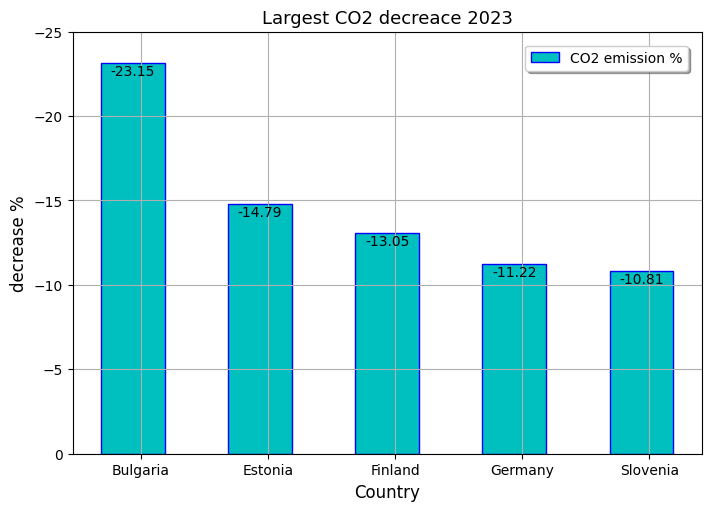

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dfpoco = smallest1_tot.copy()
dfpoco.set_index('Country', inplace=True)
df = dfpoco.iloc[:5]

df = pd.DataFrame(df, columns=['CO2 emission %'])
df

counties = df.index
countries = df.index
x = np.arange(len(countries))
width = 0.50
multiplier = 0


fig, ax = plt.subplots(layout='constrained', figsize=(7, 5))

for attribute, measurement in df.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, edgecolor="b", linewidth=1, color='cyan'[multiplier])
    ax.bar_label(rects, padding=1)
    multiplier += 1

# plot data in grouped manner of bar type
ax.set_ylabel('decrease %', fontsize=12)
ax.set_ylim(0, -25)
ax.set_xlabel('Country', fontsize=12)
ax.set_title('Largest CO2 decreace 2023', fontsize=13)
ax.set_xticks(x + width /8, countries, fontsize=10)
ax.legend(loc='upper right', borderaxespad=1, fontsize='medium', shadow=True, fancybox=True)
ax.grid()

plt.show()


Title: Countries with an active Sustainability energy plan (map)

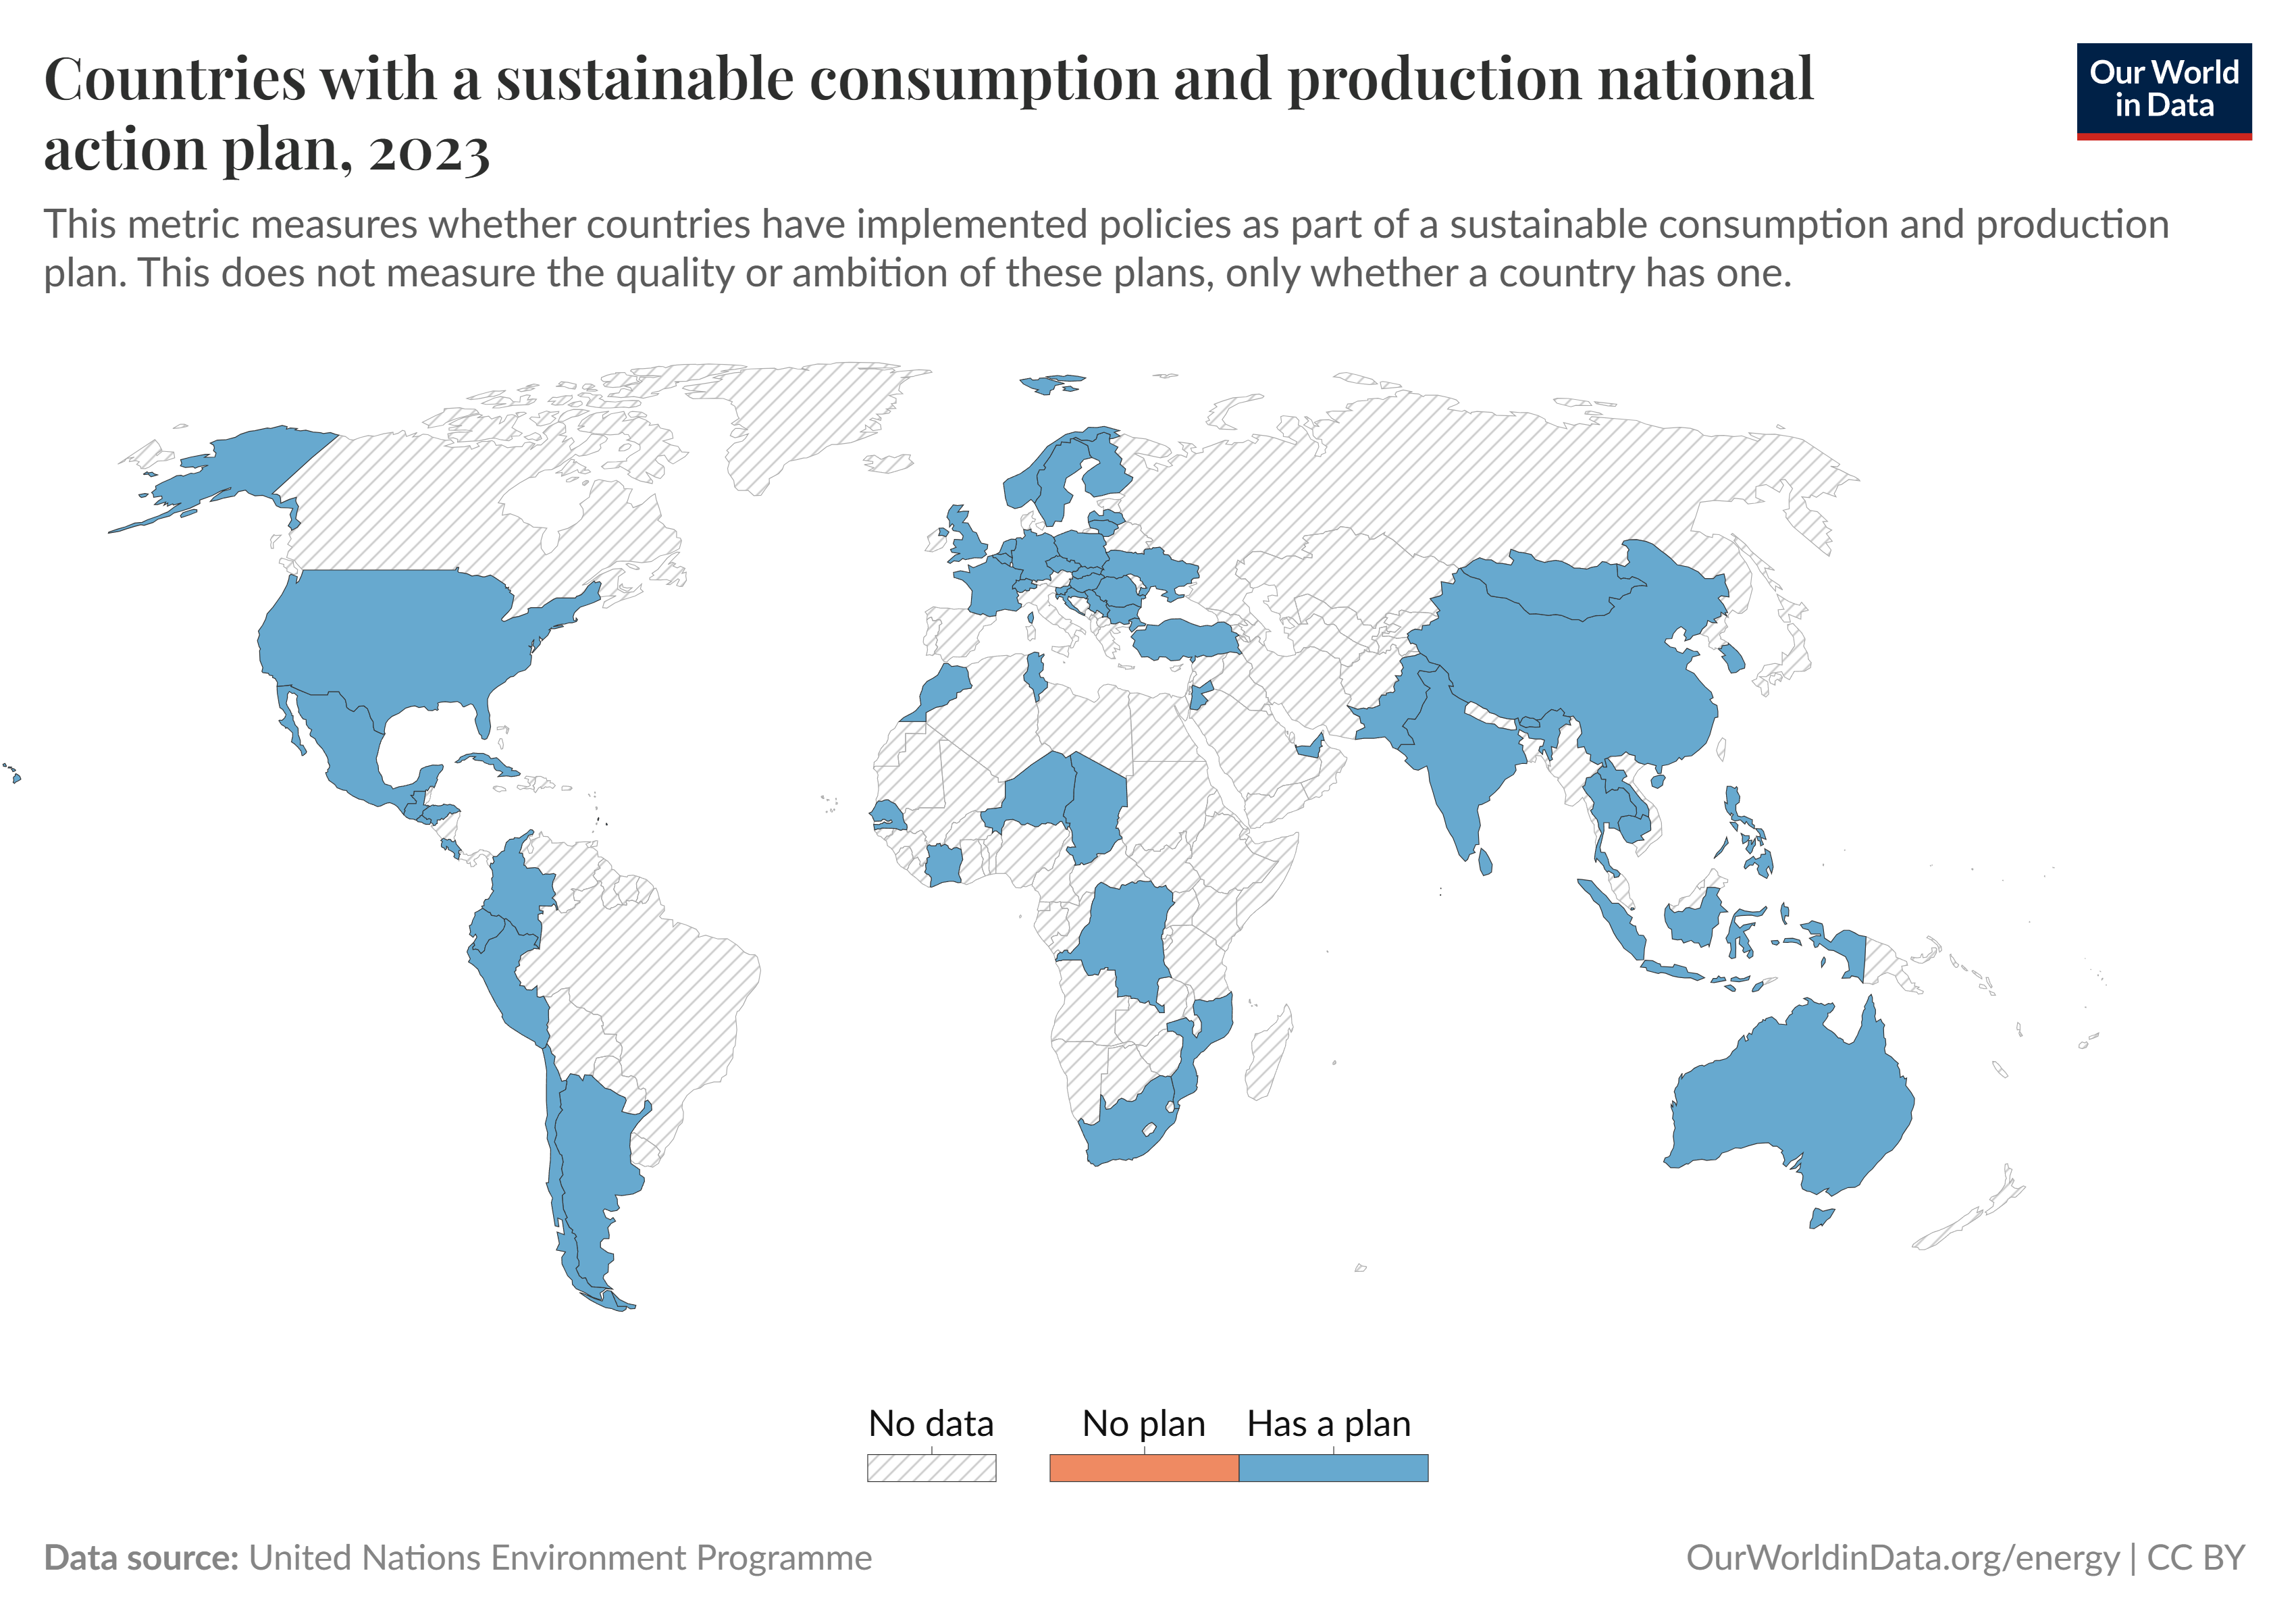